In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt    # for Visualisation
%matplotlib inline

import scipy as stats              # statistical calculations
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as st
import sys

## Read File

In [3]:
df = pd.read_csv(r'loan prediction.csv')

## Head

In [4]:
df.head() #Top 5

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail() #last 5

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
from termcolor import colored

## Shape

In [7]:
df.shape

(614, 13)

**Observation**

1. **Rows** = 614

2. **Columns** = 13

## Info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df1 =  df.copy()

In [10]:
## Cleaning of Dependent Column as its been taken as object type

df1.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [11]:
df1['Dependents'] = np.where(df1['Dependents']=='3+','3',df1['Dependents'])

In [12]:
df1.Dependents.unique()

array(['0', '1', '2', '3', nan], dtype=object)

In [13]:
## Coverting objecet datatype into float64

df1['Dependents'] = df1['Dependents'].astype('float64')

In [14]:
df1.Dependents.info()

<class 'pandas.core.series.Series'>
RangeIndex: 614 entries, 0 to 613
Series name: Dependents
Non-Null Count  Dtype  
--------------  -----  
599 non-null    float64
dtypes: float64(1)
memory usage: 4.9 KB


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [16]:
df1.Dependents.unique()

array([ 0.,  1.,  2.,  3., nan])

In [17]:
df2 =  df.copy()

In [18]:
# Another Method to replace values

df2 = df2.replace({'Dependents':{'3+':3}})

In [19]:
df2.Dependents.unique()

array(['0', '1', '2', 3, nan], dtype=object)

In [20]:
df2['Dependents'] = df2['Dependents'].astype('float64')

In [21]:
df2.Dependents.info()

<class 'pandas.core.series.Series'>
RangeIndex: 614 entries, 0 to 613
Series name: Dependents
Non-Null Count  Dtype  
--------------  -----  
599 non-null    float64
dtypes: float64(1)
memory usage: 4.9 KB


## Description

In [22]:
df1.describe().T.style.background_gradient(cmap = 'coolwarm')

,count,mean,std,min,25%,50%,75%,max
Dependents,599.000000,0.762938,1.015216,0.000000,0.000000,0.000000,2.000000,3.000000
ApplicantIncome,614.000000,5403.459283,6109.041673,150.000000,2877.500000,3812.500000,5795.000000,81000.000000
CoapplicantIncome,614.000000,1621.245798,2926.248369,0.000000,0.000000,1188.500000,2297.250000,41667.000000
LoanAmount,592.000000,146.412162,85.587325,9.000000,100.000000,128.000000,168.000000,700.000000
Loan_Amount_Term,600.000000,342.000000,65.120410,12.000000,360.000000,360.000000,360.000000,480.000000
Credit_History,564.000000,0.842199,0.364878,0.000000,1.000000,1.000000,1.000000,1.000000


**Observation:**
1. **Applicant Income**:

*  Min = 150 Max = 81000

2. **Co applicant:**

* Min = 0 Max = 41667

* CoapplicantIncome might have outliers.


3. **Loan Amount**:

* Min = 9 Max= 700 

* LoanAmount might have outliers.

4. **Loan Amount Term(in days):**

* Min days = 12 Max days =  480 

In [23]:
df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [24]:
df1.describe(include = 'object').T

,count,unique,top,freq
Loan_ID,614,614,LP001002,1
Gender,601,2,Male,489
Married,611,2,Yes,398
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


## Creating Catagorical list and Numerical list

## Data Cleaning

### Dropping Id column

In [25]:
df1.drop('Loan_ID',inplace = True, axis =1)

### Step 1- Check Duplicate Values

In [26]:
dup = df1.duplicated().sum()
print('No. of duplicate rows :', dup)

No. of duplicate rows : 0


### Step 2 - Check Null Values

In [27]:
df1.isnull().sum()*100/len(df)

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### Imputing of Missing Values

#### Gender

In [28]:
# we are going to impute the gender with mode values
print('Series Of Gender:', df1['Gender'].mode()) 
print(df1['Gender'].mode()[0]) 

Series Of Gender: 0    Male
Name: Gender, dtype: object
Male


**Observation**

In **df1['Gender'].mode()** we are getting series value thus in order to get Male out of this series value we are going to use **Indexing Method**. Thus **df1['Gender'].mode()[0]** gives out Male as output.

In [29]:
mode = df1['Gender'].mode()[0] # Taking out male

In [30]:
df1['Gender'] = df1['Gender'].fillna(mode) ## Imputing missing values

In [31]:
df1['Gender'].isnull().sum()

0

#### Dependents 

In [32]:
df1.Dependents.unique()

array([ 0.,  1.,  2.,  3., nan])

In [33]:
df1.Dependents.mean()

0.7629382303839732

In [34]:
round(df1.Dependents.mean())

1

In [35]:
mean = df1.Dependents.mean()
mean = round(mean)

In [36]:
df1['Dependents'] = df['Dependents'].fillna(mean) # We are taking mean

In [37]:
df1['Dependents'].isnull().sum()

0

In [38]:
df1['Dependents'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 614 entries, 0 to 613
Series name: Dependents
Non-Null Count  Dtype 
--------------  ----- 
614 non-null    object
dtypes: object(1)
memory usage: 4.9+ KB


In [39]:
df1.Dependents.unique()

array(['0', '1', '2', '3+', 1], dtype=object)

In [40]:
df1['Dependents'] = np.where(df1['Dependents']=='3+','3',df1['Dependents'])

In [41]:
df1.Dependents.unique()

array(['0', '1', '2', '3', 1], dtype=object)

In [42]:
## Coverting objecet datatype into float64

df1['Dependents'] = df1['Dependents'].astype('float64')

In [43]:
df1.Dependents.info()

<class 'pandas.core.series.Series'>
RangeIndex: 614 entries, 0 to 613
Series name: Dependents
Non-Null Count  Dtype  
--------------  -----  
614 non-null    float64
dtypes: float64(1)
memory usage: 4.9 KB


In [44]:
df1['Dependents'].isnull().sum()

0

#### Self_Employed

In [45]:
df1['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [46]:
mode = df1['Self_Employed'].mode()[0]

In [47]:
df1['Self_Employed'] = df1['Self_Employed'].fillna(mode)

In [48]:
df1['Self_Employed'].isnull().sum()

0

#### LoanAmount

In [49]:
mean = df1['LoanAmount'].mean()

In [50]:
mean = round(mean)

In [51]:
df1['LoanAmount'] = df1['LoanAmount'].fillna(mean)

In [52]:
df1['LoanAmount'].isnull().sum()

0

#### Loan_Amount_Term

In [53]:
mean = df1['Loan_Amount_Term'].mean()

In [54]:
df1['Loan_Amount_Term'] = df1['Loan_Amount_Term'].fillna(mean)

In [55]:
df1['Loan_Amount_Term'].isnull().sum()

0

#### Credit_History

In [56]:
mean = df1['Credit_History'].mean()

In [57]:
mean = round(mean)

In [58]:
df1['Credit_History']=df1['Credit_History'].fillna(mean)

In [59]:
df1['Credit_History'].isnull().sum()

0

#### Married

In [60]:
df1['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [61]:
mode = df1['Married'].mode()[0]

In [62]:
df1['Married']= df1['Married'].fillna(mode)

In [63]:
df1['Married'].isnull().sum()

0

In [64]:
df1.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 57.7+ KB


### Step 3 - Outlier Check

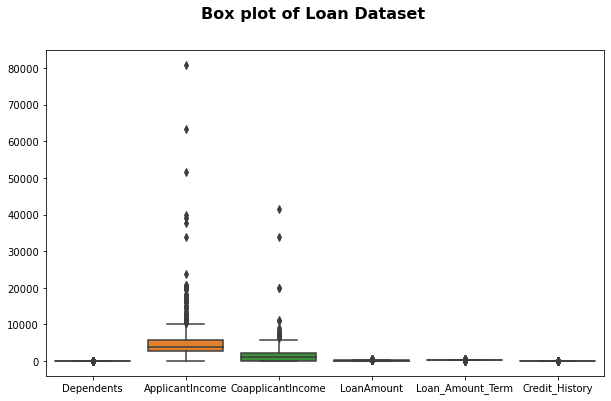

In [67]:
plt.figure(figsize =(10,6))
sns.boxplot(data = df1)

plt.suptitle('Box plot of Loan Dataset ',fontsize= 16, fontweight='bold')
plt.show()

**Observation:**

we can clearly see that **ApplicantIncome** and **CoapplicantIncome** have Outliers

### Removing Outliers

In [68]:
# Creating user define function

def remove_outlier(col):
    sorted(col)
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range, upper_range

<Figure size 2160x1440 with 0 Axes>

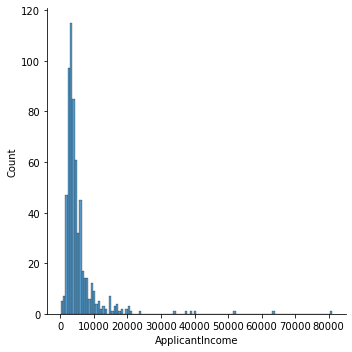

In [69]:
plt.figure(figsize =(30,20))
sns.displot(df1['ApplicantIncome'])
plt.show()

In [70]:
lr,ur = remove_outlier(df1['ApplicantIncome'])
print('ApplicantIncome : ')
print('Lower Range : ',lr,'\nUpper Range: ',ur)
df1['ApplicantIncome'] = np.where(df1['ApplicantIncome']>ur,ur,df1['ApplicantIncome'])
df1['ApplicantIncome'] = np.where(df1['ApplicantIncome']<lr,lr,df1['ApplicantIncome'])
print('')

lr,ur = remove_outlier(df1['CoapplicantIncome'])
print('CoapplicantIncome : ')
print('Lower Range : ',lr,'\nUpper Range: ',ur)
df1['CoapplicantIncome'] = np.where(df1['CoapplicantIncome']>ur,ur,df1['CoapplicantIncome'])
df1['CoapplicantIncome'] = np.where(df1['CoapplicantIncome']<lr,lr,df1['CoapplicantIncome'])
print('')


ApplicantIncome : 
Lower Range :  -1498.75 
Upper Range:  10171.25

CoapplicantIncome : 
Lower Range :  -3445.875 
Upper Range:  5743.125



In [71]:
df1.describe().T.style.background_gradient(cmap = "coolwarm")

,count,mean,std,min,25%,50%,75%,max
Dependents,614.000000,0.768730,1.003387,0.000000,0.000000,0.000000,1.000000,3.000000
ApplicantIncome,614.000000,4617.111564,2479.851729,150.000000,2877.500000,3812.500000,5795.000000,10171.250000
CoapplicantIncome,614.000000,1419.702231,1624.605892,0.000000,0.000000,1188.500000,2297.250000,5743.125000
LoanAmount,614.000000,146.397394,84.037503,9.000000,100.250000,129.000000,164.750000,700.000000
Loan_Amount_Term,614.000000,342.000000,64.372489,12.000000,360.000000,360.000000,360.000000,480.000000
Credit_History,614.000000,0.855049,0.352339,0.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
cat = df1[['Gender', 'Married', 'Education', 'Self_Employed','Property_Area','Loan_Status']]
num = df1[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Dependents','Credit_History']]

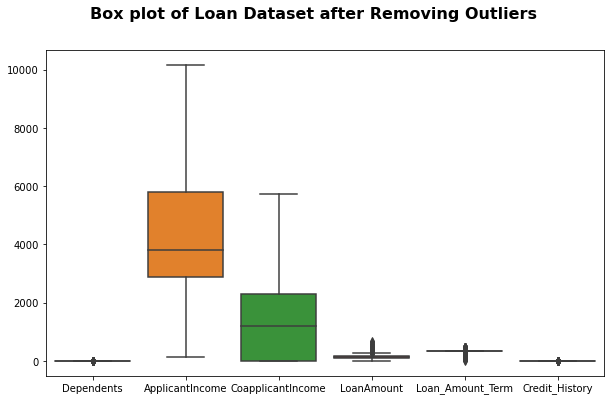

In [73]:
plt.figure(figsize =(10,6))
sns.boxplot(data = df1)

plt.suptitle('Box plot of Loan Dataset after Removing Outliers ',fontsize= 16, fontweight='bold')
plt.show()

In [74]:
df1.skew()

Dependents           0.971736
ApplicantIncome      1.039846
CoapplicantIncome    1.012763
LoanAmount           2.727127
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
dtype: float64

### Step 4 - Univariate analysis, Bivariate Analysis and Multivariate Analysis

### Univariate analysis (Catagorical)

#### Gender

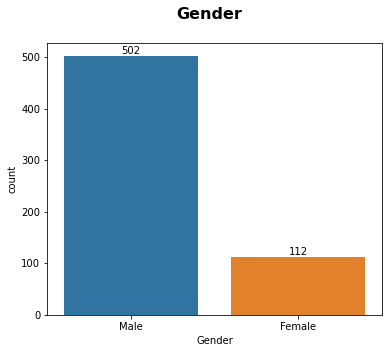

In [75]:
plt.figure(figsize = (6,5))

gen = sns.countplot(df1['Gender'])

for container in gen.containers:
    gen.bar_label(container)

plt.suptitle('Gender',fontsize= 16, fontweight='bold')
plt.show()

**Observation "Gender"**

Male count are more compared to female



#### Married

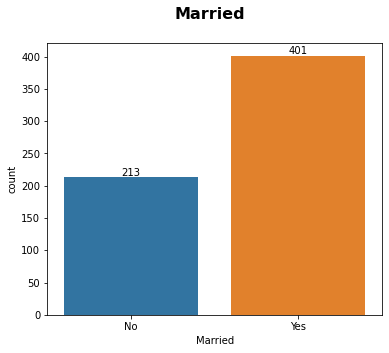

In [76]:
plt.figure(figsize = (6,5))

marr = sns.countplot(df1['Married'])

for container in marr.containers:
    marr.bar_label(container)

plt.suptitle('Married',fontsize= 16, fontweight='bold')
plt.show()

**Observation "Married"**

**Married(YES)** = 401

**Unmarried(NO)** = 213

#### Education

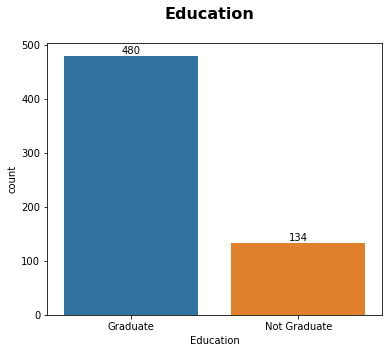

In [77]:
plt.figure(figsize = (6,5))

edu = sns.countplot(df1['Education'])

for container in edu.containers:
    edu.bar_label(container)

plt.suptitle('Education',fontsize= 16, fontweight='bold')
plt.show()

**Observation "Education"**:

**Graduate:** 480   **Non Graduate:** 134

#### Self_Employed

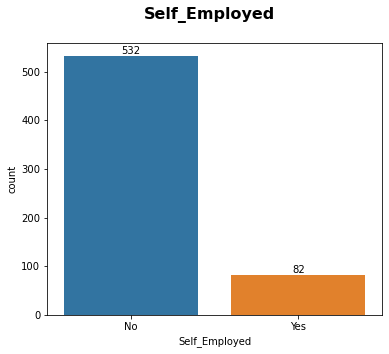

In [78]:
plt.figure(figsize = (6,5))

s_E = sns.countplot(df1['Self_Employed'])

for container in s_E.containers:
    s_E.bar_label(container)

plt.suptitle('Self_Employed',fontsize= 16, fontweight='bold')
plt.show()

**Observation "Self_Employed"**:

**YES** = 82

**NO** = 532

#### Property_Area

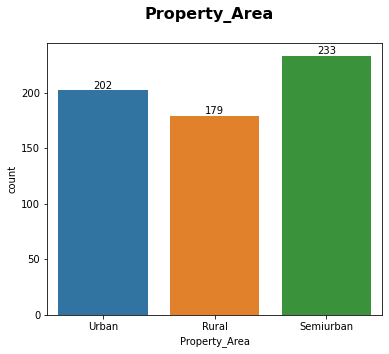

In [79]:
plt.figure(figsize = (6,5))

p_a = sns.countplot(df1['Property_Area'])

for container in p_a.containers:
    p_a.bar_label(container)

plt.suptitle('Property_Area',fontsize= 16, fontweight='bold')
plt.show()

**Observation "Property_Area¶"**:

Many customers are from **SemiUrban** areas

#### Loan_Status

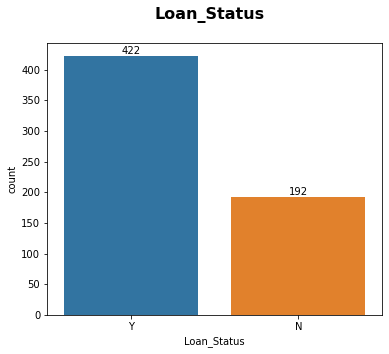

In [80]:
plt.figure(figsize = (6,5))

l_S= sns.countplot(df1['Loan_Status'])

for container in l_S.containers:
    l_S.bar_label(container)

plt.suptitle('Loan_Status',fontsize= 16, fontweight='bold')
plt.show()

**Observation "Loan_Status"**

**Yes** = 422   

**No** = 192

**Note**: Loan Status is our target Variable

### Univariate analysis (Numerical)

### ApplicantIncome

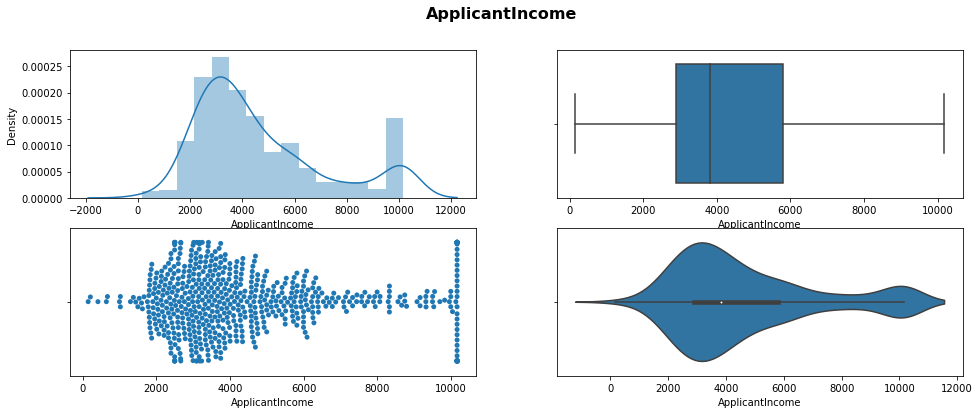

In [81]:
fig,ax = plt.subplots(nrows =2, ncols = 2, figsize =(16,6))

sns.distplot(df1['ApplicantIncome'], ax=ax[0][0])
sns.boxplot(data = df1, x = df1['ApplicantIncome'], ax=ax[0][1])
sns.swarmplot(df1['ApplicantIncome'],ax = ax[1][0])
sns.violinplot(data = df1, x = df1['ApplicantIncome'], ax=ax[1][1])

plt.suptitle('ApplicantIncome',fontsize= 16, fontweight='bold')
plt.show()

**Observation "ApplicantIncome":**

All the 4 plots clearly tell that the density of the Apllicant **Income** lies between **2000-6000**

#### CoapplicantIncome

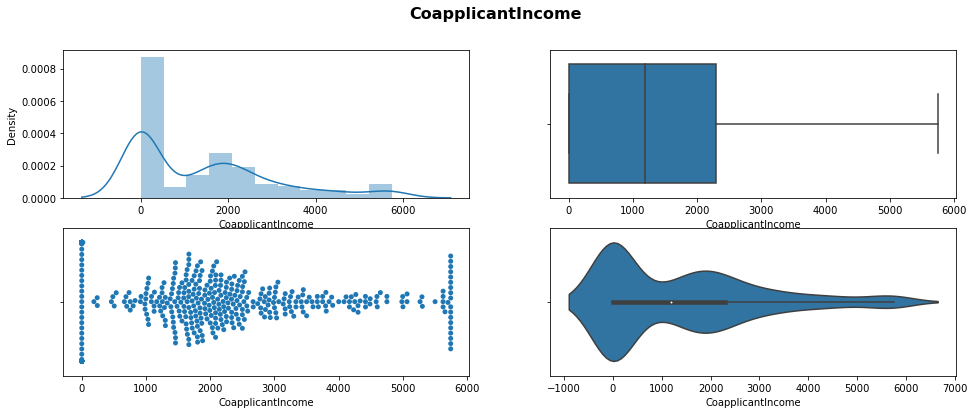

In [82]:
fig,ax = plt.subplots(nrows =2, ncols = 2, figsize =(16,6))

sns.distplot(df1['CoapplicantIncome'], ax=ax[0][0])
sns.boxplot(data = df1, x = df1['CoapplicantIncome'], ax=ax[0][1])
sns.swarmplot(df1['CoapplicantIncome'],ax = ax[1][0])
sns.violinplot(data = df1, x = df1['CoapplicantIncome'], ax=ax[1][1])

plt.suptitle('CoapplicantIncome',fontsize= 16, fontweight='bold')
plt.show()

**Observation "CoapplicantIncome":**

All the 4 plots clearly tell that the density of the **Co-Apllicant Income** lies between **1000-3000**

#### LoanAmount

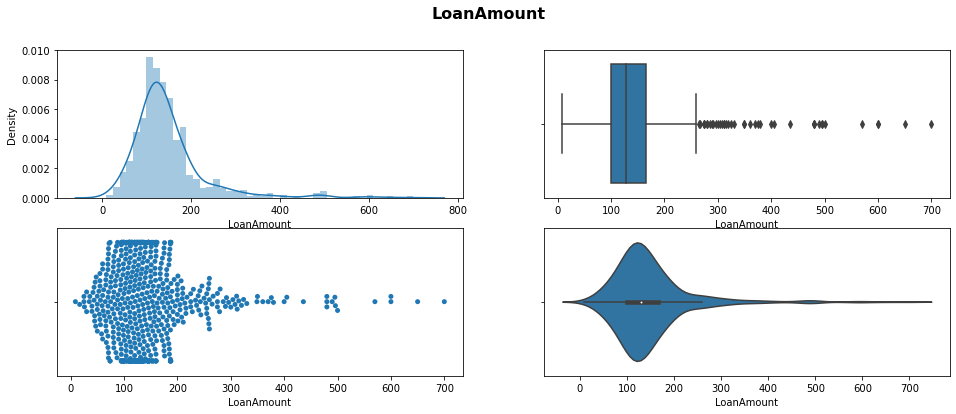

In [83]:
fig,ax = plt.subplots(nrows =2, ncols = 2, figsize =(16,6))

sns.distplot(df1['LoanAmount'], ax=ax[0][0])
sns.boxplot(data = df1, x = df1['LoanAmount'], ax=ax[0][1])
sns.swarmplot(df1['LoanAmount'],ax = ax[1][0])
sns.violinplot(data = df1, x = df1['LoanAmount'], ax=ax[1][1])

plt.suptitle('LoanAmount',fontsize= 16, fontweight='bold')
plt.show()

**Observation "LoanAmount (Thousands)":**

All the 4 plots clearly tell that the density of the **LoanAmount** lies between **70,000-1,70,000**

#### Loan_Amount_Term

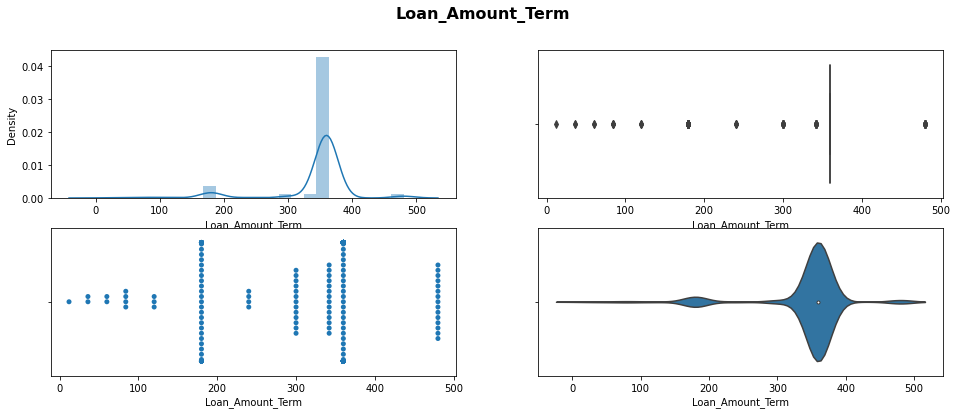

In [84]:
fig,ax = plt.subplots(nrows =2, ncols = 2, figsize =(16,6))

sns.distplot(df1['Loan_Amount_Term'], ax=ax[0][0])
sns.boxplot(data = df1, x = df1['Loan_Amount_Term'], ax=ax[0][1])
sns.swarmplot(df1['Loan_Amount_Term'],ax = ax[1][0])
sns.violinplot(data = df1, x = df1['Loan_Amount_Term'], ax=ax[1][1])

plt.suptitle('Loan_Amount_Term',fontsize= 16, fontweight='bold')
plt.show()

**Observation "Loan_Amount_Term(Months)":**

All the 4 plots clearly tell that the density of the **Loan_Amount_Term** lies at **360 Months**

In [85]:
num.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Dependents', 'Credit_History'],
      dtype='object')

#### Dependents

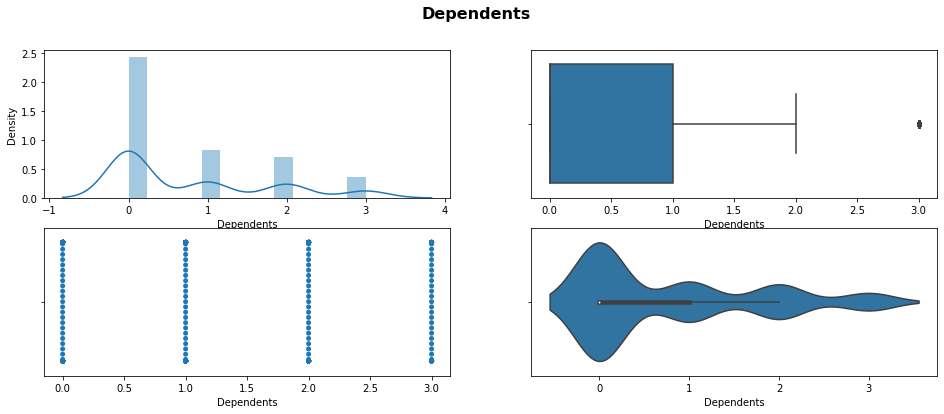

In [86]:
fig,ax = plt.subplots(nrows =2, ncols = 2, figsize =(16,6))

sns.distplot(df1['Dependents'], ax=ax[0][0])
sns.boxplot(data = df1, x = df1['Dependents'], ax=ax[0][1])
sns.swarmplot(df1['Dependents'],ax = ax[1][0])
sns.violinplot(data = df1, x = df1['Dependents'], ax=ax[1][1])

plt.suptitle('Dependents',fontsize= 16, fontweight='bold')
plt.show()

**Observation "Dependents":**

All the 4 plots clearly tell that the density of the **Dependents** lies at **0** maybe they are bachelors

#### Credit_History

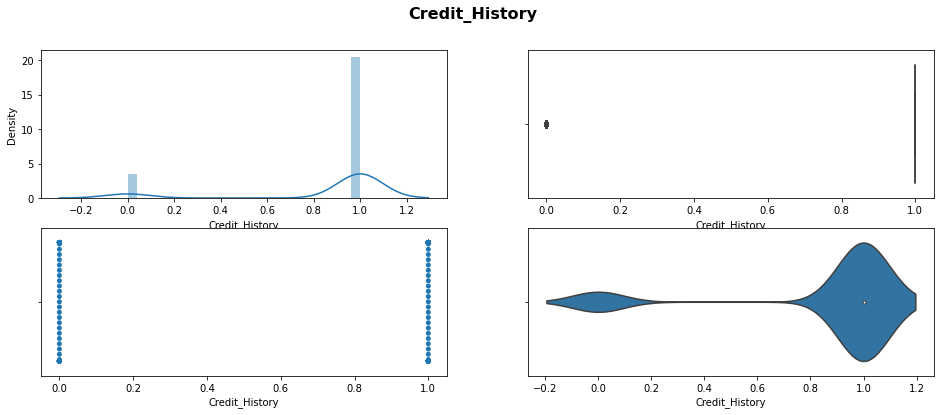

In [87]:
fig,ax = plt.subplots(nrows =2, ncols = 2, figsize =(16,6))

sns.distplot(df1['Credit_History'], ax=ax[0][0])
sns.boxplot(data = df1, x = df1['Credit_History'], ax=ax[0][1])
sns.swarmplot(df1['Credit_History'],ax = ax[1][0])
sns.violinplot(data = df1, x = df1['Credit_History'], ax=ax[1][1])

plt.suptitle('Credit_History',fontsize= 16, fontweight='bold')
plt.show()

**Observation "Credit_History":**

All the 4 plots clearly tell that the density of the **Credit_History** lies at **1** means they do have credit history

### Bi-variate analysis

#### Gender vs LoanAmount

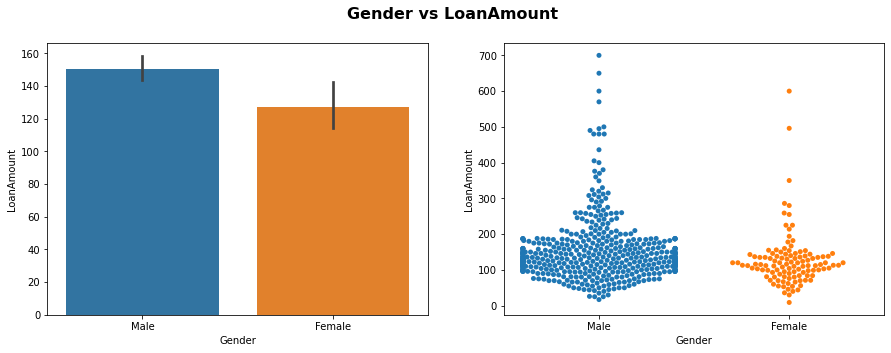

In [88]:
fig,ax = plt.subplots(nrows =1, ncols = 2, figsize =(15,5))

sns.barplot(y = df1['LoanAmount'],x = df1['Gender'], ax=ax[0])
sns.swarmplot(y = df1['LoanAmount'],x = df1['Gender'], ax=ax[1])

plt.suptitle('Gender vs LoanAmount',fontsize= 16, fontweight='bold')
plt.show()

**Observation Gender Vs LoanAmount**

* Male takes more loans compared to females

* Range of Loan amount(density) :  Male = 1,00,000 - 1,80,000

* Range of Loan amount (Density) :  Female = 90,000 - 1,50,000 

* Male take higher risk of loans compared to Females


#### Gender vs ApplicantIncome

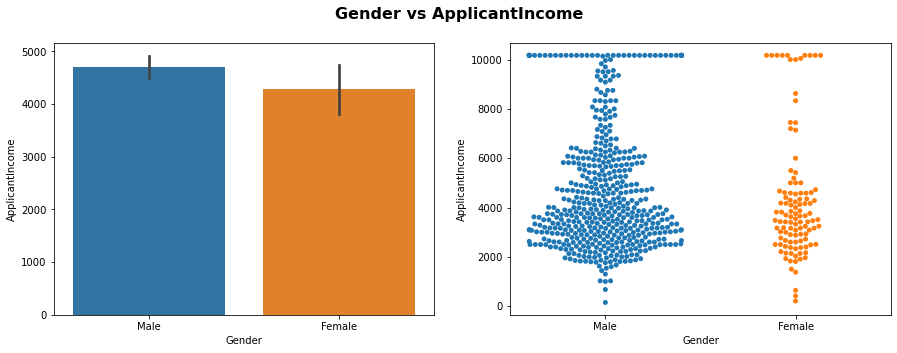

In [89]:
fig,ax = plt.subplots(nrows =1, ncols = 2, figsize =(15,5))

sns.barplot(y = df1['ApplicantIncome'],x = df1['Gender'], ax=ax[0])
sns.swarmplot(y = df1['ApplicantIncome'],x = df1['Gender'], ax=ax[1])

plt.suptitle('Gender vs ApplicantIncome',fontsize= 16, fontweight='bold')
plt.show()

**Observation Gender Vs ApplicantIncome**

* Male income are more compared to female but not much difference can be seen

* Range of ApplicantIncome(density) : Male = 1,000 - 6,000

* Range of ApplicantIncome(density) : Female = 1,000 - 5,000


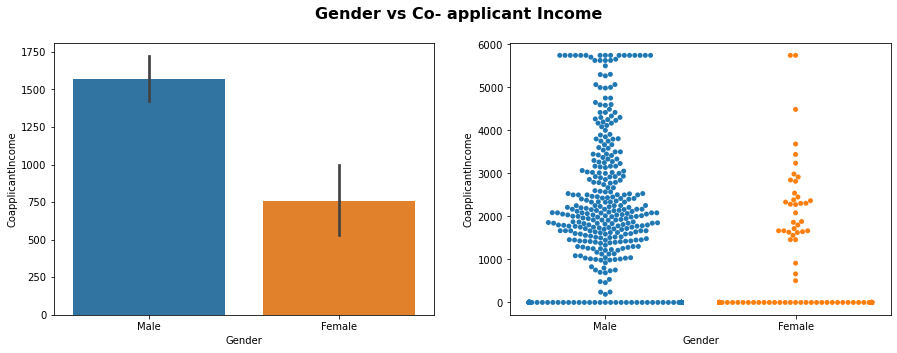

In [90]:
fig,ax = plt.subplots(nrows =1, ncols = 2, figsize =(15,5))

sns.barplot(y = df1['CoapplicantIncome'],x = df1['Gender'], ax=ax[0])
sns.swarmplot(y = df1['CoapplicantIncome'],x = df1['Gender'], ax=ax[1])

plt.suptitle('Gender vs Co- applicant Income',fontsize= 16, fontweight='bold')
plt.show()

**Observation Gender Vs CoapplicantIncome**

* High no. Males are co apllicant

* Range of Co- Apllicant(Density) : Male = 1,000 - 3,000

* Range of Co- Apllicant(Density) : female = 1,300 - 2,500

#### LoanAmount vs Property_Area

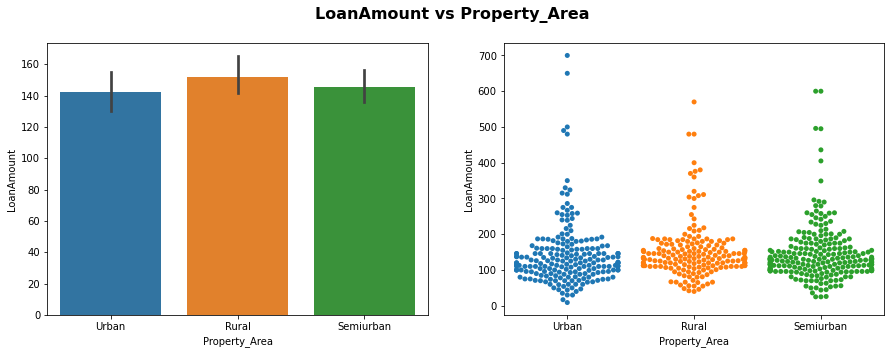

In [91]:
fig,ax = plt.subplots(nrows =1, ncols = 2, figsize =(15,5))

sns.barplot(y = df1['LoanAmount'],x = df1['Property_Area'], ax=ax[0])
sns.swarmplot(y = df1['LoanAmount'],x = df1['Property_Area'], ax=ax[1])

plt.suptitle('LoanAmount vs Property_Area',fontsize= 16, fontweight='bold')
plt.show()

**Observation**

* Rural Area has the highest Loan takers

* Most of the Loan Amount density is in range of 1,00,000 and 2,00,000

#### Loan_Status vs ApplicantIncome

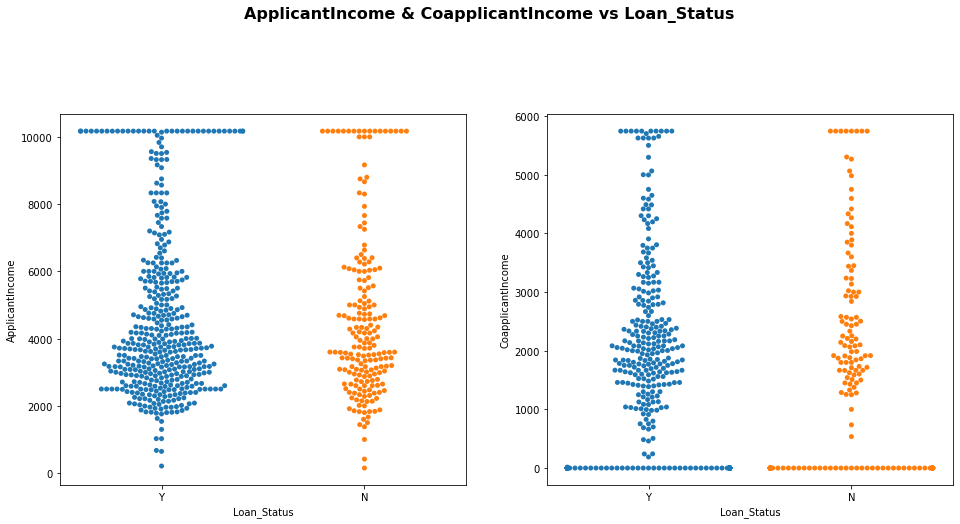

In [92]:
### Swarm plot
plt.figure(figsize = (16,15))

plt.subplot(2,2,1)
sns.swarmplot(y = df1['ApplicantIncome'],x = df1['Loan_Status'])

plt.subplot(2,2,2)
sns.swarmplot(y = df1['CoapplicantIncome'],x = df1['Loan_Status'])

plt.suptitle('ApplicantIncome & CoapplicantIncome vs Loan_Status ',fontsize= 16, fontweight='bold')
plt.show()

**Observation ApplicantIncome & CoapplicantIncome vs Loan_Status:**

* When Applicant Income is in range of 2,000-6,000 then density of Loan given is High.

* When Co-Applicant Income is in range of 1,000 - 3,000 then density of Loan given is High.


### Multi-variate analysis

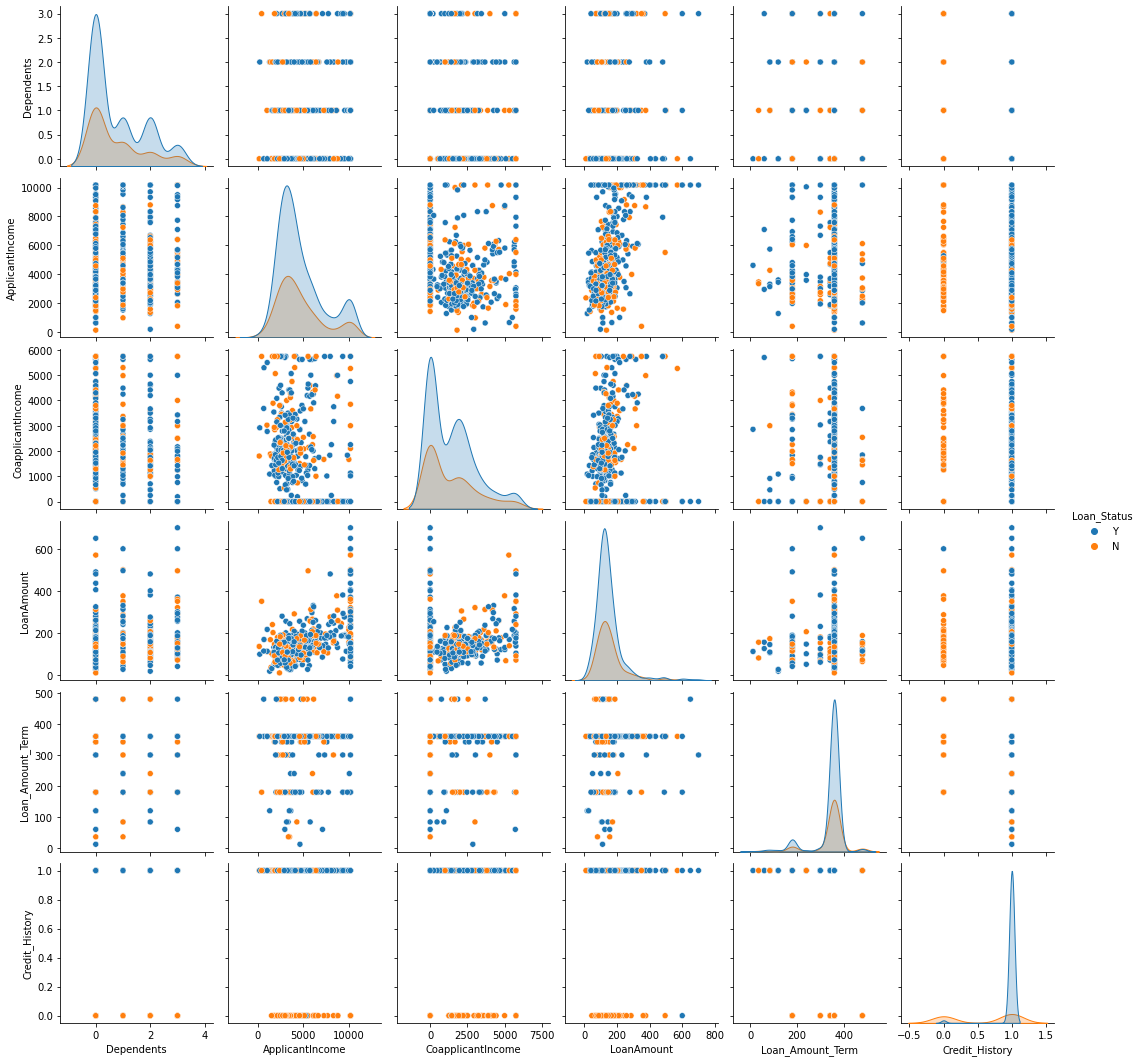

In [93]:
sns.pairplot(df1,hue ='Loan_Status')

**Observation:**

High Correlation can be seen between **Applicant Income,Coapplicant Income and Loan amount**

#### ApplicantIncome vs LoanAmount vs Gender

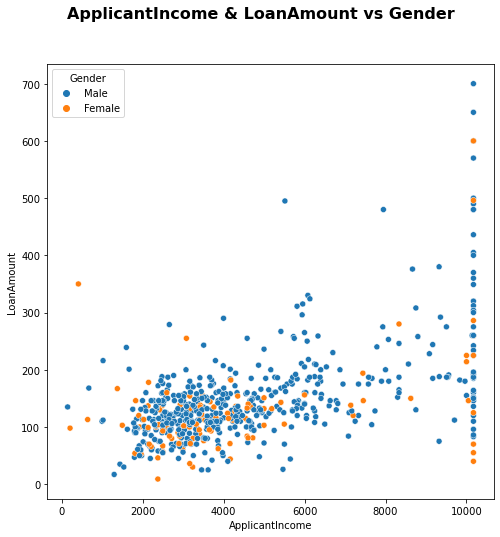

In [94]:
plt.figure(figsize = (8,8))
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',hue='Gender',data=df1)

plt.suptitle('ApplicantIncome & LoanAmount vs Gender ',fontsize= 16, fontweight='bold')
plt.show()

**ApplicantIncome vs LoanAmount vs Gender**

* As applicant income increases then amount of loan taken also increase. 

* High density can be seen when Income level of applicant is between 2,000 - 6,000 takes loan between 60,000 - 2,00,000 

#### ApplicantIncome & CoapplicantIncome vs Loan_Status

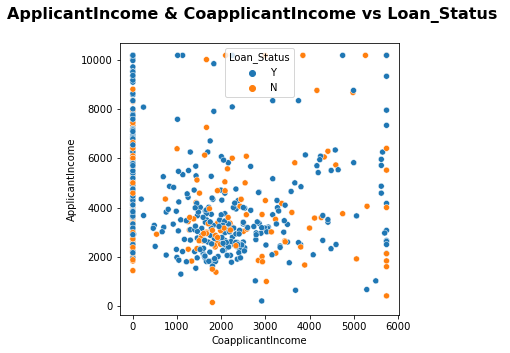

In [95]:
plt.figure(figsize = (5,5))
sns.scatterplot(x='CoapplicantIncome',y='ApplicantIncome',hue='Loan_Status',data=df1)

plt.suptitle('ApplicantIncome & CoapplicantIncome vs Loan_Status ',fontsize= 16, fontweight='bold')
plt.show()

**Observation**

* When Applicant Income is in range of 2,000-4,000 and Co-applicant Income is in range 1,000-3,000 most loans given density is high

#### ApplicantIncome & LoanAmount vs Loan_Status

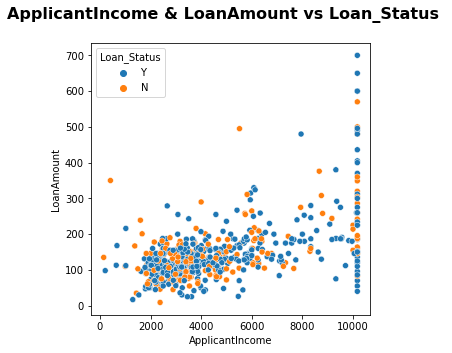

In [96]:
plt.figure(figsize = (5,5))
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',hue='Loan_Status',data=df1)

plt.suptitle('ApplicantIncome & LoanAmount vs Loan_Status ',fontsize= 16, fontweight='bold')
plt.show()

**Observation**

* As income increases loan amount increases 

* High loan given when income is 10,000

* High density of loan given when income range is between 2,000-8,000

#### CoapplicantIncome & LoanAmount vs Loan_Status

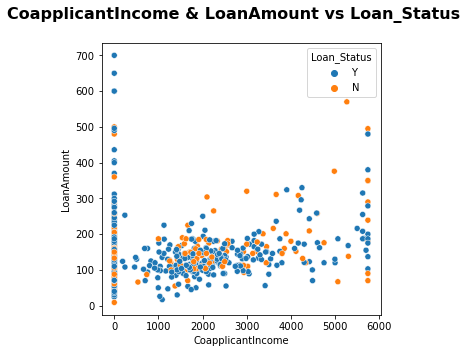

In [97]:
plt.figure(figsize = (5,5))
sns.scatterplot(x='CoapplicantIncome',y='LoanAmount',hue='Loan_Status',data=df1)

plt.suptitle('CoapplicantIncome & LoanAmount vs Loan_Status ',fontsize= 16, fontweight='bold')
plt.show()

**Observation**

* As Co-applicant income increases loan amount increases 


* High density of loan given when Co-applicant income range is between 1,000-4,000

### Correlation matrix

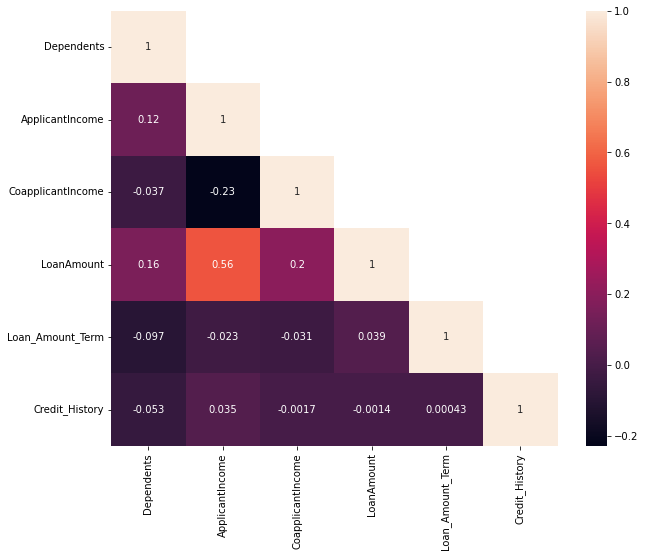

In [98]:
corr = df1.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True,mask=np.triu(corr.corr(),+1));

**Observation**

* High positive correlation between Applicant income and Loan Amount

* High negative correlation between Applicant income and Co -Applicant income

* Also a good correlation between **Co -Applicant income and Loan Amount** also **Loan Amount and Dependents** and **Applicant income and Dependents**

### Encoding object data to Numerical

In [99]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(6), object(6)
memory usage: 57.7+ KB


In [100]:
## Gender

df1.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [101]:
df1['Gender'].replace({'Male':1,'Female':0}, inplace = True) 

In [102]:
## Married

df1.Married.unique()

array(['No', 'Yes'], dtype=object)

In [103]:
df1['Married'].replace({'Yes':1,'No':0}, inplace = True)

In [104]:
## Education

df1.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [105]:
df1['Education'].replace({'Graduate':1,'Not Graduate':0}, inplace = True)

In [106]:
## Self_Employed

df1.Self_Employed.unique()

array(['No', 'Yes'], dtype=object)

In [107]:
df1['Self_Employed'].replace({'Yes':1,'No':0}, inplace = True)

In [108]:
## Loan_Status

df1.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [109]:
df1['Loan_Status'].replace({'Y':1,'N':0}, inplace = True)

In [110]:
## Property_Area

df1.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [111]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 57.7+ KB


In [112]:
df1_dummy = pd.get_dummies(df1,drop_first=True)
df1_dummy.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0.0,1,0,5849.0,0.0,146.0,360.0,1.0,1,0,1
1,1,1,1.0,1,0,4583.0,1508.0,128.0,360.0,1.0,0,0,0
2,1,1,0.0,1,1,3000.0,0.0,66.0,360.0,1.0,1,0,1
3,1,1,0.0,0,0,2583.0,2358.0,120.0,360.0,1.0,1,0,1
4,1,0,0.0,1,0,6000.0,0.0,141.0,360.0,1.0,1,0,1


### Building Logistical Regression Model

##### Variance Inflation Factor (VIF) for checking Multicollinearity

In [113]:
import statsmodels.formula.api as sm

In [114]:
def vif_cal(input_data):
    x_vars = input_data
    xvar_names = input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y = x_vars[xvar_names[i]]
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = sm.ols(formula = 'y~x',data = x_vars).fit().rsquared
        vif = round(1/(1-rsq),2)
        print(xvar_names[i],"VIF = ",vif)

In [115]:
vif_cal(input_data=df1_dummy[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Semiurban', 'Property_Area_Urban']])

Gender VIF =  1.21
Married VIF =  1.34
Dependents VIF =  1.2
Education VIF =  1.09
Self_Employed VIF =  1.07
ApplicantIncome VIF =  1.94
CoapplicantIncome VIF =  1.4
LoanAmount VIF =  1.82
Loan_Amount_Term VIF =  1.04
Credit_History VIF =  1.43
Loan_Status VIF =  1.47
Property_Area_Semiurban VIF =  1.49
Property_Area_Urban VIF =  1.46


##### We can consider a rule of thumb that if vif is greater than 5, we can choose to drop the variable as there can be a problem of multicollinearity. This essentially means that we can choose to drop a predictor variable whose 80% variation is being explained by the other predictor variables.

### Linear Regression using statsmodels

In [116]:
df1_dummy.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

### Model 1

In [117]:
f_1 = 'Loan_Status~ Gender +Married + Dependents + Education + Self_Employed + ApplicantIncome + CoapplicantIncome + LoanAmount + Loan_Amount_Term + Credit_History + Property_Area_Semiurban + Property_Area_Urban'

In [118]:
model_1 = sm.ols(formula =f_1, data =df1_dummy).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Loan_Status   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     23.52
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           4.22e-43
Time:                        13:01:28   Log-Likelihood:                -281.02
No. Observations:                 614   AIC:                             588.0
Df Residuals:                     601   BIC:                             645.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0084      0.112      0.075      0.941      -0.212       0.229
Gender                     -0.0024      0.044     -0.055      0.956      -0.090       0.085
Married                     0.0838      0.038      2.215      0.027       0.009       0.158
Dependents                  0.0071      0.017      0.418      0.676      -0.026       0.041
Education                   0.0585      0.039      1.484      0.138      -0.019       0.136
Self_Employed               0.0009      0.047      0.020      0.984      -0.092       0.094
ApplicantIncome          1.014e-06   8.78e-06      0.116      0.908   -1.62e-05    1.82e-05
CoapplicantIncome        2.762e-06   1.14e-05      0.243      0.808   -1.95e-05    2.51e-05
LoanAmount                 -0.0003      0.000     -1.355      0.176      -0.001       0.000
Loan_Amount_Term           -0.0001      0.000     -0.505      0.614      -0.001       0.000
Credit_History              0.7007      0.045     15.720      0.000       0.613       0.788
Property_Area_Semiurban     0.1279      0.039      3.288      0.001       0.052       0.204
Property_Area_Urban         0.0333      0.040      0.829      0.407      -0.046       0.112
==============================================================================
Omnibus:                       95.094   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.201
Skew:                          -1.145   Prob(JB):                     9.77e-31
Kurtosis:                       3.398   Cond. No.                     3.96e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Ovservations**:

**(1)** ${R^2}$ value and the Adjusted ${R^2}$ value says **Model 1 can easily explain 32% of the data**.

**(2)** For the **Prob {F-statistic}** of the Linear Regression the null and alternate Hypothesis is as follows:
#### ${H_0}$ : The Regression is not valid
#### ${H_1}$:  The Regression is valid


as Prob(F-Stats) <0.05 i.e. 4.22e-43 < 0.05 thus ${H_1}$ is valid


**(3)** We notice that the p-value for the t-statistic calculation for the **'Gender, Dependents, Education,Self_Employed, ApplicantIncome,CoapplicantIncome, LoanAmount,Loan_Amount_Term, Property_Area_Urban'** variables is the highest (higher than 0.05) so as to reduce **MULTI-COLLINEARITY**

Since **Self_Employed** has the highest P-value we will first drop that and check the scores again 

### Checking the Residuals of the Dataset

<AxesSubplot:>

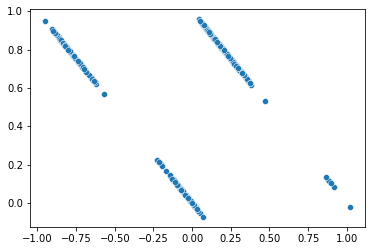

In [119]:
#Linear Relationship b/w Dependent and Independent Varaibles

sns.scatterplot(model_1.resid,model_1.fittedvalues)

**Observations :**

* Residual plots display the residual values on the y-axis and fitted values, or another variable, on the x-axis. After you fit a regression model, it is crucial to check the residual plots. If your plots display unwanted patterns, you can’t trust the regression coefficients and other numeric results.

* If you look at a series of errors, it should look random. If there are patterns in the errors, this means that you can use one error to predict another. As with the die analogy, if there are patterns in the residuals, you need to adjust your model. But, don’t fret, this just means that you can improve the fit of the model by moving this predictability over to the deterministic side of things (i.e., your independent variables).

* check that they are randomly scattered around zero for the entire range of fitted values. When the residuals center on zero, they indicate that the model’s predictions are correct on average rather than systematically too high or low. Regression also assumes that the residuals follow a normal distribution and that the degree of scattering is the same for all fitted values.

* https://statisticsbyjim.com/regression/interpret-r-squared-regression/

* https://statisticsbyjim.com/regression/check-residual-plots-regression-analysis/

<AxesSubplot:title={'center':'Boxplot of the residuals'}>

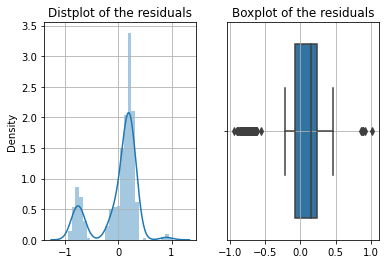

In [120]:
f,a =  plt.subplots(1,2,sharex=False,sharey=False,squeeze=False)


plot_0 = sns.distplot(model_1.resid,ax=a[0][0])
a[0][0].set_title('Distplot of the residuals')
a[0][0].grid()

plot_1 = sns.boxplot(model_1.resid,orient='v',ax=a[0][1])
a[0][1].set_title('Boxplot of the residuals')
a[0][1].grid();
plot_1

### Model 2 ( drop ' Self_Employed ')

In [121]:
f_2 = 'Loan_Status~Gender +Married + Dependents + Education + ApplicantIncome + CoapplicantIncome + LoanAmount + Loan_Amount_Term + Credit_History + Property_Area_Semiurban + Property_Area_Urban'

In [122]:
model_2 = sm.ols(formula =f_2, data =df1_dummy).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Loan_Status   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     25.70
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           8.11e-44
Time:                        13:01:29   Log-Likelihood:                -281.02
No. Observations:                 614   AIC:                             586.0
Df Residuals:                     602   BIC:                             639.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0084      0.112      0.075      0.940      -0.212       0.228
Gender                     -0.0025      0.044     -0.056      0.956      -0.090       0.085
Married                     0.0838      0.038      2.217      0.027       0.010       0.158
Dependents                  0.0071      0.017      0.420      0.675      -0.026       0.040
Education                   0.0585      0.039      1.485      0.138      -0.019       0.136
ApplicantIncome           1.05e-06   8.58e-06      0.122      0.903   -1.58e-05    1.79e-05
CoapplicantIncome        2.771e-06   1.13e-05      0.244      0.807   -1.95e-05     2.5e-05
LoanAmount                 -0.0003      0.000     -1.358      0.175      -0.001       0.000
Loan_Amount_Term           -0.0001      0.000     -0.506      0.613      -0.001       0.000
Credit_History              0.7007      0.045     15.734      0.000       0.613       0.788
Property_Area_Semiurban     0.1279      0.039      3.291      0.001       0.052       0.204
Property_Area_Urban         0.0333      0.040      0.829      0.407      -0.046       0.112
==============================================================================
Omnibus:                       95.102   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.219
Skew:                          -1.145   Prob(JB):                     9.69e-31
Kurtosis:                       3.398   Cond. No.                     3.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observation**


Lets drop **Gender** Column

<AxesSubplot:>

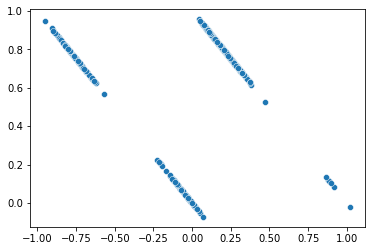

In [123]:
#Linear Relationship b/w Dependent and Independent Varaibles

sns.scatterplot(model_2.resid,model_2.fittedvalues)

<AxesSubplot:title={'center':'Boxplot of the residuals'}>

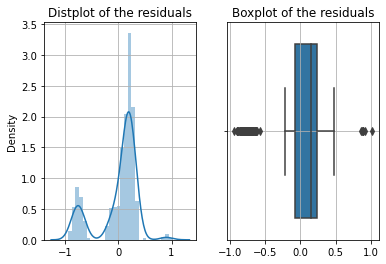

In [124]:
f,a =  plt.subplots(1,2,sharex=False,sharey=False,squeeze=False)


plot_0 = sns.distplot(model_2.resid,ax=a[0][0])
a[0][0].set_title('Distplot of the residuals')
a[0][0].grid()

plot_1 = sns.boxplot(model_2.resid,orient='v',ax=a[0][1])
a[0][1].set_title('Boxplot of the residuals')
a[0][1].grid();
plot_1

   ### Model 3 ( drop ' Gender ')

In [125]:
f_3 = 'Loan_Status~Married + Dependents + Education + ApplicantIncome + CoapplicantIncome + LoanAmount + Loan_Amount_Term + Credit_History + Property_Area_Semiurban + Property_Area_Urban'

In [126]:
model_3 = sm.ols(formula =f_3, data =df1_dummy).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Loan_Status   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     28.32
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           1.48e-44
Time:                        13:01:30   Log-Likelihood:                -281.03
No. Observations:                 614   AIC:                             584.1
Df Residuals:                     603   BIC:                             632.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0069      0.108      0.063      0.949      -0.206       0.220
Married                     0.0832      0.036      2.304      0.022       0.012       0.154
Dependents                  0.0071      0.017      0.417      0.677      -0.026       0.040
Education                   0.0586      0.039      1.493      0.136      -0.018       0.136
ApplicantIncome          1.005e-06   8.53e-06      0.118      0.906   -1.58e-05    1.78e-05
CoapplicantIncome        2.678e-06   1.12e-05      0.239      0.811   -1.93e-05    2.47e-05
LoanAmount                 -0.0003      0.000     -1.358      0.175      -0.001       0.000
Loan_Amount_Term           -0.0001      0.000     -0.505      0.614      -0.001       0.000
Credit_History              0.7007      0.044     15.748      0.000       0.613       0.788
Property_Area_Semiurban     0.1281      0.039      3.317      0.001       0.052       0.204
Property_Area_Urban         0.0333      0.040      0.831      0.406      -0.045       0.112
==============================================================================
Omnibus:                       95.120   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.258
Skew:                          -1.145   Prob(JB):                     9.50e-31
Kurtosis:                       3.398   Cond. No.                     3.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observation :**

Lets drop **ApplicantIncome**

<AxesSubplot:>

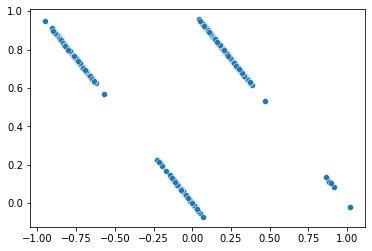

In [127]:
#Linear Relationship b/w Dependent and Independent Varaibles

sns.scatterplot(model_3.resid,model_3.fittedvalues)

<AxesSubplot:title={'center':'Boxplot of the residuals'}>

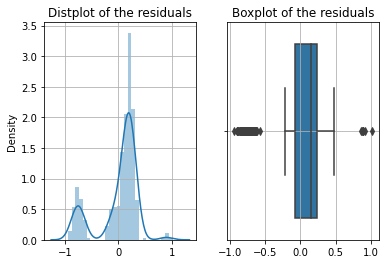

In [128]:
f,a =  plt.subplots(1,2,sharex=False,sharey=False,squeeze=False)


plot_0 = sns.distplot(model_3.resid,ax=a[0][0])
a[0][0].set_title('Distplot of the residuals')
a[0][0].grid()

plot_1 = sns.boxplot(model_3.resid,orient='v',ax=a[0][1])
a[0][1].set_title('Boxplot of the residuals')
a[0][1].grid();
plot_1

   ### Model 4 ( drop ' ApplicantIncome ')

In [129]:
f_4 = 'Loan_Status~Married + Dependents + Education + CoapplicantIncome + LoanAmount + Loan_Amount_Term + Credit_History + Property_Area_Semiurban + Property_Area_Urban'

In [130]:
model_4 = sm.ols(formula =f_4, data =df1_dummy).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Loan_Status   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     31.51
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           2.58e-45
Time:                        13:01:31   Log-Likelihood:                -281.03
No. Observations:                 614   AIC:                             582.1
Df Residuals:                     604   BIC:                             626.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0100      0.105      0.095      0.925      -0.197       0.216
Married                     0.0832      0.036      2.307      0.021       0.012       0.154
Dependents                  0.0071      0.017      0.418      0.676      -0.026       0.040
Education                   0.0594      0.039      1.534      0.125      -0.017       0.135
CoapplicantIncome        2.116e-06   1.01e-05      0.209      0.835   -1.78e-05     2.2e-05
LoanAmount                 -0.0003      0.000     -1.637      0.102      -0.001     6.4e-05
Loan_Amount_Term           -0.0001      0.000     -0.518      0.604      -0.001       0.000
Credit_History              0.7009      0.044     15.776      0.000       0.614       0.788
Property_Area_Semiurban     0.1279      0.039      3.318      0.001       0.052       0.204
Property_Area_Urban         0.0330      0.040      0.826      0.409      -0.045       0.112
==============================================================================
Omnibus:                       95.195   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.415
Skew:                          -1.146   Prob(JB):                     8.78e-31
Kurtosis:                       3.397   Cond. No.                     1.50e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

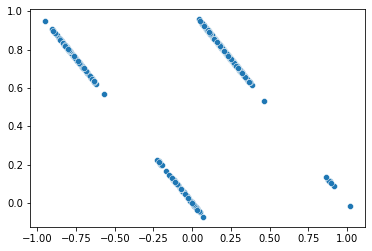

In [131]:
#Linear Relationship b/w Dependent and Independent Varaibles

sns.scatterplot(model_4.resid,model_4.fittedvalues)

<AxesSubplot:title={'center':'Boxplot of the residuals'}>

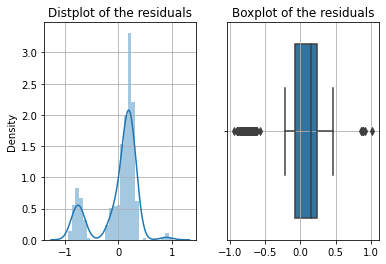

In [132]:
f,a =  plt.subplots(1,2,sharex=False,sharey=False,squeeze=False)


plot_0 = sns.distplot(model_4.resid,ax=a[0][0])
a[0][0].set_title('Distplot of the residuals')
a[0][0].grid()

plot_1 = sns.boxplot(model_4.resid,orient='v',ax=a[0][1])
a[0][1].set_title('Boxplot of the residuals')
a[0][1].grid();
plot_1

### It looks like Linear Regression won't work for this case study but for better understanding lets do RMSE Score check for this 

# Only for Predictive purposes of Linear Regression

If we only wanted to predict using Linear Regression and was not looking for the model building aspect of it, we can do that as well.

First we will split the data into train and test. We will build the model on the training data and check the RMSE on the test data.

###### Note: We are going to build all the models and use those predict first and then go on to evaluate those models.